> # Importante!
> Execute os códigos nas suas respectivas sequências para evitar erros.

# Título: 
## Análise da relação entre os jogos mais jogados da plataforma Steam e dos jogos mais assistidos na plataforma de streaming Twitch

# Nomes: 
  


*   ##     Brunno Toscano Messias 
*   ##     Marco Antonio Lopes Rodrigues





  

# Descrição:

Nesta projeto apuramos informações retiradas do site TwitchMetric e SteamDB para verificar correlaçõs entre os jogos da Steam e as suas atuações na plataforma de streaming Twitch.

Analisamos os jogos de acordo com os jogadores simultâneos e os dados de espectadores da Twitch (também foi efetuado um levantamento aproximado de renda para os jogos que não são grátis).

# Fontes:

- Fonte principal dos dados da plataforma Steam: steamdb.info

- Fonte principal dos dados da Twitch: https://www.twitchmetrics.net


# Links para planilhas
Twitch: https://drive.google.com/u/0/uc?id=1oPZyo28_uzAoFFPFUQN7PVBSR0wZjAJF&export=download

Steam:
- Dia 1: https://drive.google.com/u/0/uc?id=10ZGbbug6DQ0lKAyzyXm5xnK9lu-ptVXt&export=download
- Dia 2: https://drive.google.com/u/0/uc?id=1CBkXBuyMMglnlwgLFFSd488mmZYTDQVh&export=download
- Dia 3: https://drive.google.com/u/0/uc?id=17jbv04-J6IdvkI0Rb_qiR5c8ZIl7rWHm&export=download

Dados da Twitch coletados no dia 10/11/2020, informações com base no ultimos 30 dias.

Dados da Steam coletados nos dias 7/11, 8/11 e 9/11 respectivamente.

Colunas (Twitch):  

*   Mais Assistidos: Classificado pelo total de horas de visualização (horas ao vivo x média de espectadores).
*   Mais Transmitidos: Classificado pela média de canais ao vivo simultâneos.
*   Maior Pico de Views: Classificado pela maior contagem de espectadores registrada.
*   Mais Populares: Classificado pela maior contagem média de espectadores.




-
-

#Link para o vídeo:
https://youtu.be/OLW9o8yAx0Q

*Importando bibliotecas e planilhas.*..

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Steam
dfs = pd.read_csv("https://drive.google.com/u/0/uc?id=10ZGbbug6DQ0lKAyzyXm5xnK9lu-ptVXt&export=download")
dfs2 = pd.read_csv("https://drive.google.com/u/0/uc?id=1CBkXBuyMMglnlwgLFFSd488mmZYTDQVh&export=download")
dfs3 = pd.read_csv("https://drive.google.com/u/0/uc?id=17jbv04-J6IdvkI0Rb_qiR5c8ZIl7rWHm&export=download")
#Twitch
dfTwitch = pd.read_csv("https://drive.google.com/u/0/uc?id=1oPZyo28_uzAoFFPFUQN7PVBSR0wZjAJF&export=download")

# **Análise Twitch**

Começamos com a leitura da planilha e vamos ordena-la pelo pico de Views do maior para menor (para melhor compreensão apenas listamos os 5 primeiros resultados).




In [ ]:
dfTwitch[['Jogo','PicoViewers']].sort_values(by="PicoViewers", ascending=False).head(5)

,Jogo,PicoViewers
0,League of Legends,1999606
1,Among Us,762073
4,Counter-Strike: Global Offensive,546239
6,FIFA 21,469155
5,Minecraft,458576


Aqui podemos ver que há uma diferença gritante da primeira colocação para a segunda.
Após uma pequena pesquisa sobre o jogo é possível ver que no mês de Outubro (quando os dados foram coletados) houve um campeonato mundial alcançando 1 999 606 viewers simultâneos. 

https://globoesporte.globo.com/esports/lol/noticia/worlds-2020-tabela-datas-e-horarios-dos-jogos-no-mundial-de-lol.ghtml



Vamos olhar diretamente para a relação Estudio e popularidade do jogo em questão. Ordenando a tabela pela popularidade.

In [ ]:
dfTwitch[['Jogo','Estudio','MaisPopulares']].sort_values(by='MaisPopulares', ascending=False).head(10)

,Jogo,Estudio,MaisPopulares
0,League of Legends,Riot Game,296976
1,Among Us,InnerSloth,137106
2,Fortnite,Epic Games,106881
3,Call Of Duty: Modern Warfare,Activision,87211
4,Counter-Strike: Global Offensive,Valve Corporation,79179
5,Minecraft,Mojang,73458
6,FIFA 21,EA,71029
7,Grand Theft Auto V,Rockstar Games,68809
8,VALORANT,Riot Game,50027
9,Dota 2,Valve Corporation,46324


Dentre os 10 jogos mais populares fora o estudio indie de Among Us (InnerSloth), todos os outros são empresas grandes e já consolidadas no mercado, demonstrando a grande predominância nesse setor.

Procurando por mais constância vamos analisar o valores referentes a média.

In [ ]:
dfTwitch.sort_values(by='MaisPopulares', ascending=False).head(5)

,Jogo,MaisAssistido,PicoViewers,MaisTransmitidos,Estudio,MaisPopulares
0,League of Legends,143073458,1999606,555,Riot Game,296976
1,Among Us,99539302,762073,455,InnerSloth,137106
2,Fortnite,77595243,458562,539,Epic Games,106881
3,Call Of Duty: Modern Warfare,63315502,377775,491,Activision,87211
4,Counter-Strike: Global Offensive,57483595,546239,197,Valve Corporation,79179


Será que os jogos mais transmitidos são os que tem uma maior média de espectadores ?

Podemos ver se esta situação é real analisando a correlação das duas variáveis. 

In [ ]:

print((dfTwitch['MaisTransmitidos'].astype(float)).corr(dfTwitch['MaisPopulares']))


0.7721160165267262


A partir de 7, ja podemos considerar uma relação forte. Fazendo um gráfico fica mais visível esta correlação.



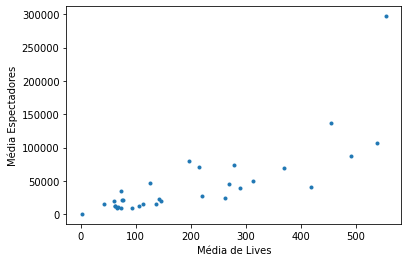

In [ ]:
plt.xlabel("Média de Lives")
plt.ylabel("Média Espectadores")
print(plt.plot(dfTwitch['MaisTransmitidos'].astype(float),dfTwitch['MaisPopulares'].astype(float),'.'))


Podemos enxergar um ponto fora da curva devido o momento exepcional que coletamos os dados.

A partir de uma reta de regressão linear (uma reta que se adequa ao dados), podemos ver de forma visual o que essa correlação siginifca.

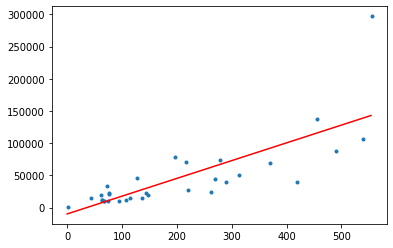

In [ ]:
x=dfTwitch['MaisTransmitidos']
y=dfTwitch['MaisPopulares']
(a, b) = np.polyfit(x, y, deg = 1)
x = np.arange(0,555,1	)
y = a*x+b
print(plt.plot(dfTwitch['MaisTransmitidos'].astype(float),dfTwitch['MaisPopulares'].astype(float),'.'))
plt.plot(x,y,'r')

Mas podemos perceber que nesta situação utilizar ela como predição não seria muito útil devido os fatores externos que influenciam as medições, como no caso do jogo League Of Legends.

# **Análise Steam**

Os dados coletados da plataforma Steam foram de três dias diferentes, então para efetuar nossa análise com mais precisão iremos fazer uma média dos três dias.

Os únicos dados que mudam entre os três dias são os de "Jogadores Simultaneos" e "Pico" respectivamente (o "Pico" se refere ao pico de jogadores simultâneos do respectivo dia).

In [ ]:
dfs["Jogadores Simultaneos"] = (dfs["Jogadores Simultaneos"] + dfs2["Jogadores Simultaneos"]  + dfs3["Jogadores Simultaneos"])/3
dfs["Pico"] = (dfs["Pico"] + dfs2["Pico"] +dfs3["Pico"])/3
dfs = dfs.astype({"Jogadores Simultaneos": int, "Pico": int})
dfs.head(5)

,Jogo,Jogadores Simultaneos,Pico,Preco (),Estimativa de Vendas (mi),Renda,Estudio
0,Counter-Strike: Global Offensive,913811,960533,"0,00",150,"0,00",Valve
1,Dota 2,604434,653296,"0,00",150,"0,00",Valve
2,PLAYERUNKNOWN'S BATTLEGROUNDS,227612,376259,"75,00",75,"5.625.000.000,00",PUBG Corporation
3,Among Us,134344,314251,"10,89",35,"381.150.000,00",InnerSloth
4,Apex Legends,103378,111756,"0,00","3,5","0,00",Respawn Entertainment


Agora com a média feita vamos organizar a lista com base no pico de jogadores simultâneos (para termos uma ideia melhor da popularidade de cada jogo nesse período de três dias).

In [ ]:
dfs.sort_values(by="Pico", ascending=False)

,Jogo,Jogadores Simultaneos,Pico,Preco (),Estimativa de Vendas (mi),Renda,Estudio
0,Counter-Strike: Global Offensive,913811,960533,"0,00",150,"0,00",Valve
1,Dota 2,604434,653296,"0,00",150,"0,00",Valve
2,PLAYERUNKNOWN'S BATTLEGROUNDS,227612,376259,"75,00",75,"5.625.000.000,00",PUBG Corporation
3,Among Us,134344,314251,"10,89",35,"381.150.000,00",InnerSloth
6,Rocket League,98620,115213,"36,99",15,"554.850.000,00",Psyonix
5,Grand Theft Auto V,98075,114977,"69,99",35,"2.449.650.000,00",Rockstar
4,Apex Legends,103378,111756,"0,00","3,5","0,00",Respawn Entertainment
9,Team Fortress 2,80827,101230,"0,00",75,"0,00",Valve
7,Rust,86171,97867,"75,49",15,"1.132.350.000,00",Facepunch Studios
8,ARK: Survival Evolved,80444,89112,"93,99","7,5","704.925.000,00",Studio Wildcard


Podemos notar que há uma diferença muito grande entre o pico de jogadores do jogo **Counter-Strike** e o resto dos jogos da lista, tornando evidente que, dentre todos os jogos da plataforma, Counter-Strike é incontestávelmente o mais popular!

O interessante é que o jogo Counter-Strike conseguiu se manter popular durante muito tempo, dados do SteamDB mostram que o jogo se manteve no top 10 desde 2016!

Essa consistência é surpreendente, considerando que a primeira versão do jogo foi lançada em 1999.


---

Agora vamos analisar quantos jogos são grátis dentre os 15 mais populares.

Para isso, ordenaremos a tabela com base no preço (ordem crescente):

In [ ]:
dfs.sort_values(by="Preco (R$)")

,Jogo,Jogadores Simultaneos,Pico,Preco (R$),Estimativa de Vendas (mi),Renda,Estudio
0,Counter-Strike: Global Offensive,913811,960533,"R$0,00",150,"R$0,00",Valve
1,Dota 2,604434,653296,"R$0,00",150,"R$0,00",Valve
4,Apex Legends,103378,111756,"R$0,00","3,5","R$0,00",Respawn Entertainment
9,Team Fortress 2,80827,101230,"R$0,00",75,"R$0,00",Valve
11,Destiny 2,72295,80459,"R$0,00",15,"R$0,00",Bungie
13,Warframe,53803,62267,"R$0,00",35,"R$0,00",Digital Extremes
3,Among Us,134344,314251,"R$10,89",35,"R$381.150.000,00",InnerSloth
14,Sid Meier's Civilization VI,47699,52296,"R$129,00","7,5","R$967.500.000,00",Firaxis Games
12,Football Manager 2020,64424,68764,"R$137,81","3,5","R$482.335.000,00",Sports Interactive
6,Rocket League,98620,115213,"R$36,99",15,"R$554.850.000,00",Psyonix


Dentre os top 15 da plataforma, mais de um terço (6) dos jogos são grátis! Isso mostra que a falta de arrecadação por vendas compensa na popularidade do jogo em questão. Vale ressaltar que os jogos grátis não têm a renda nula, o valor da tabela é baseado *somente* no preço de venda multiplicado pela estimativa de vendas.

Isso é evidente no caso do jogo Counter-Strike mencionado anteriormente, que mesmo sendo grátis (era um jogo pago até dezembro de 2018) continua arrecadando milhões por ano. Afinal, o último campeonato de 2019 teve uma premiação total equivalente a 4,5 milhões de dólares, mais que o dobro da arrecadação por vendas do décimo primeiro colocado (Tom Clancy's Rainbow Six Siege).


---

Dentre o top 15, qual empresa é a mais predominante? Para responder essa pergunta, vamos usar o comando sort_values novamente, usando a coluna Estúdio como referência.

In [ ]:
dfs.sort_values(by="Estudio")

,Jogo,Jogadores Simultaneos,Pico,Preco (R$),Estimativa de Vendas (mi),Renda,Estudio
11,Destiny 2,72295,80459,"R$0,00",15,"R$0,00",Bungie
13,Warframe,53803,62267,"R$0,00",35,"R$0,00",Digital Extremes
7,Rust,86171,97867,"R$75,49",15,"R$1.132.350.000,00",Facepunch Studios
14,Sid Meier's Civilization VI,47699,52296,"R$129,00","7,5","R$967.500.000,00",Firaxis Games
3,Among Us,134344,314251,"R$10,89",35,"R$381.150.000,00",InnerSloth
2,PLAYERUNKNOWN'S BATTLEGROUNDS,227612,376259,"R$75,00",75,"R$5.625.000.000,00",PUBG Corporation
6,Rocket League,98620,115213,"R$36,99",15,"R$554.850.000,00",Psyonix
4,Apex Legends,103378,111756,"R$0,00","3,5","R$0,00",Respawn Entertainment
5,Grand Theft Auto V,98075,114977,"R$69,99",35,"R$2.449.650.000,00",Rockstar
12,Football Manager 2020,64424,68764,"R$137,81","3,5","R$482.335.000,00",Sports Interactive


Observamos pela tabela acima que a empresa Valve (que por sinal é a empresa responsável pela Steam) detém três lugares no top 15 de sua plataforma, todos eles gratuitos para jogar.

Isso é um fato surpreendente considerando que esses mesmos três jogos são os mais antigos dentre todos os da lista!


---

Quantas pessoas estavam jogando (em média) nos três dias? Podemos responder isso facilmente usando o comando **sum** (utilizaremos como base novamente a coluna "Pico")

In [ ]:
dfs["Pico"].sum()

3285451

Aproximadamente 3,3 milhões de jogadores!

Para finalizar, vamos analisar qual é a renda total de vendas dos top 15 utilizando novamente o comando sum (transformamos em valor int pois não há nenhum número com valores decimais)

In [ ]:
dfsr = dfs["Renda"].apply(lambda x: x.replace('.', '')).apply(lambda x: x.replace(',00', ''))
dfsr2 = pd.to_numeric(dfsr)
dfsr2.sum()

14397410000

Com isso notamos que os 15 jogos mais populares da Steam já arrecadaram 14,3 milhões de reais! (sem contar a renda real dos jogos gratuitos, que é bem expressiva como vimos anteriormente).

# **Análise Tabelas em conjunto**



Primeiro como a plataforma de distruibuição de games Steam tem a restrição de jogos que são suportados/lançados por ela e, a Twitch sendo praticamente universal em questões de jogos, temos que fazer uma comparação entre os jogos que conincidem nas duas.

Primeiro vamos efetuar alguma etapas:


*   Vamos criar um novo DataFrame; 
*   Fazer uma comparação entre as linhas das duas tabelas (Steam e Twitch) buscando as quais os jogos são iguais;
*   Quando a condição acima for verdadeira o código adicionará uma linha na nova tabela contendo todas as informações do game das duas tabela.





In [ ]:
index=dfs.index.argmax()+1
#print(index)
index2=dfTwitch.index.argmax()+1
#print(index2)
#dfs.loc[0, 'Jogo']
index3=0

dfTeste = pd.DataFrame(columns=['Jogo','Jogadores Simultaneos',	'Pico',	'Preco (R$)',	
                                'Estimativa de Vendas (mi)',	'Renda'	,'MaisAssistido',
                                'PicoViewers',	'MaisTransmitidos',	'Estudio',	'MaisPopulares'])
for x in range (index):
  for y in range (index2):
    if dfs.loc[x, 'Jogo'] == dfTwitch.loc[y, 'Jogo']:
      #print(x,y)
      
      dfTeste.loc[index3] = [dfs.loc[x, 'Jogo'],dfs.loc[x, 'Jogadores Simultaneos'],dfs.loc[x, 'Pico'],dfs.loc[x, 'Preco (R$)'],
                             dfs.loc[x, 'Estimativa de Vendas (mi)'],dfs.loc[x, 'Renda'],dfTwitch.loc[y, 'MaisAssistido'],dfTwitch.loc[y, 'PicoViewers'],
                             dfTwitch.loc[y, 'MaisTransmitidos'],dfTwitch.loc[y, 'Estudio'],dfTwitch.loc[y, 'MaisPopulares']] 
      #dfTeste
      index3 +=1
      
    else:
      continue

dfTeste

,Jogo,Jogadores Simultaneos,Pico,Preco (R$),Estimativa de Vendas (mi),Renda,MaisAssistido,PicoViewers,MaisTransmitidos,Estudio,MaisPopulares
0,Counter-Strike: Global Offensive,913811,960533,"R$0,00",150,"R$0,00",57483595,546239,197,Valve Corporation,79179
1,Dota 2,604434,653296,"R$0,00",150,"R$0,00",33630887,220742,127,Valve Corporation,46324
2,PLAYERUNKNOWN'S BATTLEGROUNDS,227612,376259,"R$75,00",75,"R$5.625.000.000,00",10709565,67710,114,PUBG Corporation,14751
3,Among Us,134344,314251,"R$10,89",35,"R$381.150.000,00",99539302,762073,455,InnerSloth,137106
4,Apex Legends,103378,111756,"R$0,00","3,5","R$0,00",28891525,253064,290,EA,39795
5,Grand Theft Auto V,98075,114977,"R$69,99",35,"R$2.449.650.000,00",49955024,197852,369,Rockstar Games,68809
6,Rocket League,98620,115213,"R$36,99",15,"R$554.850.000,00",16523320,238352,143,Psyonix,22759
7,Tom Clancy's Rainbow Six Siege,75317,87171,"R$59,99",35,"R$2.099.650.000,00",9064111,70343,107,Ubisoft,12485


Com essas informações podemos perceber que mais da metade dos jogos mais populares da Steam, estão em alta na plataforma de streaming. Então é um fato que a popularidade do jogo influência nos número atingidos pelas lives.

In [ ]:
dfTwitch[['Jogo','PicoViewers','MaisTransmitidos']].sort_values(by='PicoViewers', ascending=False).head(15)

,Jogo,PicoViewers,MaisTransmitidos
0,League of Legends,1999606,555
1,Among Us,762073,455
4,Counter-Strike: Global Offensive,546239,197
6,FIFA 21,469155,216
5,Minecraft,458576,279
2,Fortnite,458562,539
3,Call Of Duty: Modern Warfare,377775,491
27,NBA 2K21,316820,67
25,Watch Dogs: Legion,316820,61
30,The Dark Pictures Anthology: Little Hope,307174,76


Com as tabelas comparadas se poder perceber também que a Twitch é bem mais instável, a popularidade é um fator importante para seus grandes números, fato perceptível analisando os picos de viewers de jogos que se mantém constantemente no alto com seus número médios de streamers, e jogos com médias de lives menores alcançando esses valores.

